In [1]:
import pickle

f_name = "BT_1.pkl"
with open(f_name, "rb") as f:
    _results = pickle.load(f)

0 
11    7399
10      67
9        1
Name: count, dtype: int64


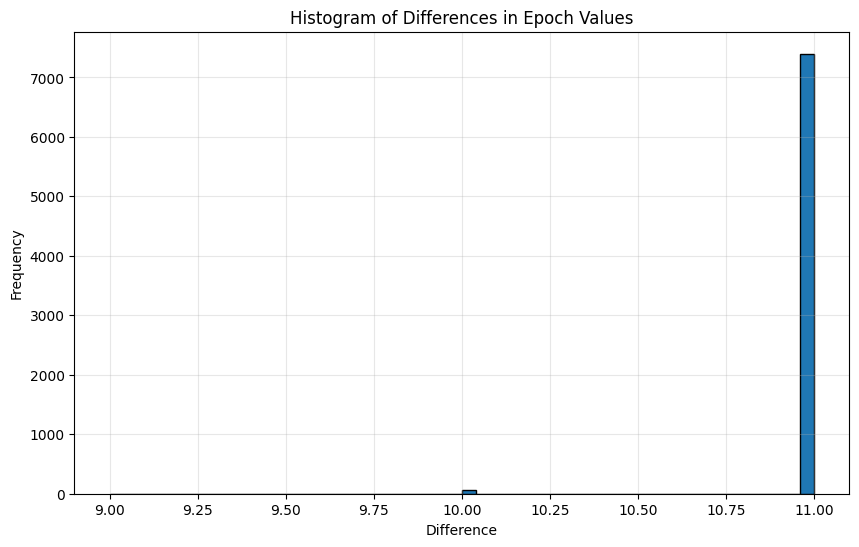

In [2]:
epoch_values = _results["loss_values"]["epoch_values"]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

differences = np.diff(epoch_values)
print(pd.DataFrame(differences).value_counts())

plt.figure(figsize=(10, 6))
plt.hist(differences, bins=50, edgecolor="black")
plt.title("Histogram of Differences in Epoch Values")
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
loss_v = _results["loss_values"]["loss_values"]
# Create a smoothed version with moving average
window = 100  # Adjust window size as needed
loss_smooth = np.convolve(loss_v, np.ones(window) / window, mode="valid")

import plotly.graph_objs as go
import plotly.offline as pyo

x = list(range(len(loss_v)))
x_smooth = list(range(int(window / 2), int(window / 2) + len(loss_smooth)))

trace = go.Scatter(x=x, y=loss_v, mode="markers", name="Loss", marker=dict(size=1))
trace2 = go.Scatter(
    x=x_smooth,
    y=loss_smooth,
    mode="lines",
    name="Smoothed Loss",
    line=dict(width=2, color="red"),
)
layout = go.Layout(
    title="Training Loss",
    xaxis=dict(title="Step", range=[37_000, 48_000]),
    yaxis=dict(title="Loss"),
    width=1000,
    height=400,
)
fig = go.Figure(data=[trace, trace2], layout=layout)
pyo.iplot(fig)

In [4]:
import pandas as pd

_game_results = _results["epochs_results"]
N_AGENTS = len(_game_results) + 1  # real agents, not  with dummy # from 0 to N_AGENTS]
v = [
    -1,  # Dummy
] + list(range(N_AGENTS))

results = pd.DataFrame(0.0, index=v, columns=v)
results

-1      0      1      2      3      4      5      6      7      8     \
-1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 7464    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 7465    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 7466    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 7467    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 7468    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...   7459   7460   7461   7462   7463   7464   7465   7466   7467  \
-1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 7464  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 7465  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 7466  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 7467  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
 7468  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

        7468  
-1       0.0  
 0       0.0  
 1       0.0  
 2       0.0  
 3       0.0  
...      ...  
 7464    0.0  
 7465    0.0  
 7466    0.0  
 7467    0.0  
 7468    0.0  

[7470 rows x 7470 columns]

In [5]:
_res_i = _game_results[8 - 1]  # id agent - 1
_res_i
for _res_ij in _res_i.items():
    print(_res_ij)

(0, {'wins': 4, 'losses': 6, 'draws': 0})
(1, {'wins': 5, 'losses': 5, 'draws': 0})
(2, {'wins': 6, 'losses': 4, 'draws': 0})
(3, {'wins': 6, 'losses': 4, 'draws': 0})
(4, {'wins': 5, 'losses': 5, 'draws': 0})
(5, {'wins': 7, 'losses': 3, 'draws': 0})
(6, {'wins': 5, 'losses': 4, 'draws': 1})
(7, {'wins': 5, 'losses': 5, 'draws': 0})


In [6]:
results.loc[8, 0]
# results.loc[5, 8]

0.0

In [7]:
results.head(10)

-1      0      1      2      3      4      5      6      7      8     ...  \
-1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 7    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
 8    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

     7459   7460   7461   7462   7463   7464   7465   7466   7467   7468  
-1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 7    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 8    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[10 rows x 7470 columns]

In [8]:
_res_i.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [9]:
for i_m1, _res_i in enumerate(_game_results):
    i = i_m1 + 1  # index of the new agent

    for j, _res_ij in _res_i.items():
        results.loc[i, j] += _res_ij["wins"]
        results.loc[j, i] += _res_ij["losses"]

        # draws are half win and half loss
        results.loc[i, j] += _res_ij["draws"] / 2
        results.loc[j, i] += _res_ij["draws"] / 2

# Access wins of i over j
w = lambda i, j: results[j][i]

In [ ]:
# results.to_pickle("results_BT1.pkl")
import pandas as pd

results = pd.read_pickle("results_BT1.pkl")

In [7]:
N_AGENTS = results.shape[0] - 1  # exclude dummy agent
N_AGENTS

7469

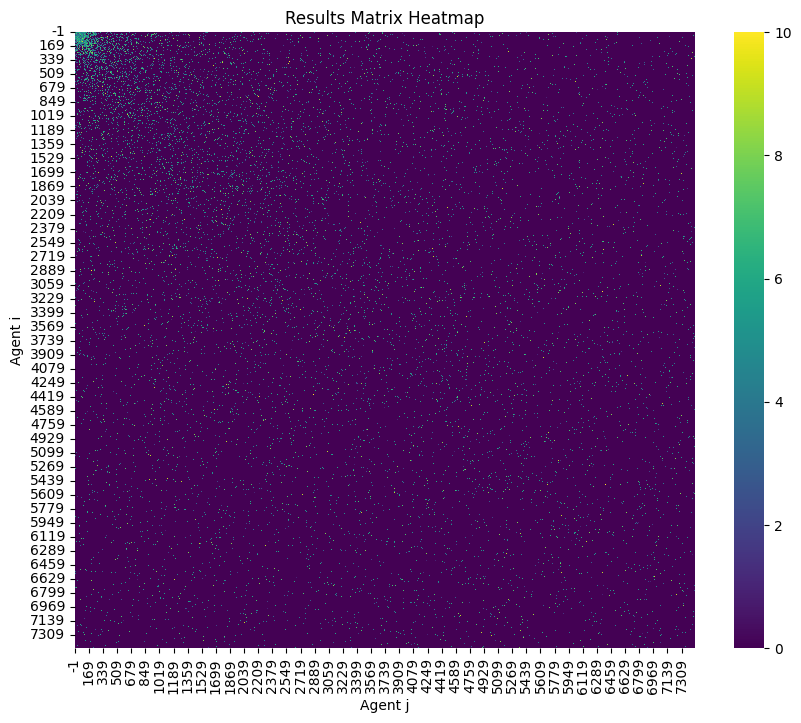

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(results, cmap="viridis", cbar=True)
plt.title("Results Matrix Heatmap")
plt.xlabel("Agent j")
plt.ylabel("Agent i")
plt.show()

In [4]:
import numpy as np

# Regularization

# Add a row and column of ones for the dummy player
results.loc[-1] = 1.0
results[-1] = 1.0
results.loc[-1, -1] = 0.0  # Dummy does not play itself
results.head(10)

-1      0      1      2      3      4      5      6      7      8     ...  \
-1    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
 0    1.0    0.0    7.0    5.0    5.0    3.0    5.0    5.0    6.0    6.0  ...   
 1    1.0    3.0    0.0    3.0    5.0    6.0    7.0    2.0    4.0    5.0  ...   
 2    1.0    5.0    7.0    0.0    6.0    5.0    6.0    4.0    5.0    4.0  ...   
 3    1.0    5.0    5.0    4.0    0.0    6.0    4.0    4.0    3.0    4.0  ...   
 4    1.0    7.0    4.0    5.0    4.0    0.0    4.0    4.0    4.0    5.0  ...   
 5    1.0    5.0    3.0    4.0    6.0    6.0    0.0    6.0    4.0    3.0  ...   
 6    1.0    5.0    8.0    6.0    6.0    6.0    4.0    0.0    5.5    4.5  ...   
 7    1.0    4.0    6.0    5.0    7.0    6.0    6.0    4.5    0.0    5.0  ...   
 8    1.0    4.0    5.0    6.0    6.0    5.0    7.0    5.5    5.0    0.0  ...   

     7459   7460   7461   7462   7463   7464   7465   7466   7467   7468  
-1    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
 0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 7    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 8    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[10 rows x 7470 columns]

In [5]:
from math import prod
import pandas as pd

# Access wins of i over j
w = lambda i, j: results[j][i]  # redefine

from tqdm import tqdm


def calculate_BradleyTerry(
    score: dict[int, float],
    W: pd.DataFrame,
    EPOCHS: int = 4,
    diff_threshold: float = 1e-3,
    verbose=False,
):
    """Calculate Bradley-Terry scores given initial scores and a win matrix W.
    # Arguments:
        score: (dict) Initial scores for each agent.
        W: A DataFrame where W.iloc[i, j] is the number of wins of agent i over agent j.
        EPOCHS: Maximum number of iterations to perform.
        diff_threshold: Threshold for convergence based on the change in scores.
        verbose: If True, print progress information.
    """
    N_AGENTS = len(score)
    print(f"Calculating Bradley-Terry for {N_AGENTS} agents.")
    for _ in range(EPOCHS):
        # score_new = [0.0] * N_AGENTS
        score_old = score.copy()
        for i in tqdm(score, desc="BT Epoch", disable=not verbose):
            _num, _den = 0, 0
            for j in score:
                if i == j:
                    continue
                try:
                    wins_of_i_over_j = float(W.loc[i, j])  # type: ignore
                except Exception:
                    print(f"Missing data for W.loc[{i}, {j}]")
                    return
                loses_of_i_to_j = float(W.loc[j, i])  # type: ignore

                _num += wins_of_i_over_j * score[j] / (score[i] + score[j])
                _den += loses_of_i_to_j / (score[i] + score[j])

            score[i] = _num / _den
            # score_new[i] = _num / _den

            # Normalize by geometric mean -- not used for numerical stability
            # _m_g = prod([x ** (1 / N_AGENTS) for x in score_new])
            # score_new = [x / _m_g for x in score_new]
        diff_norm2 = (
            sum((score[i] - score_old[i]) ** 2 for i in score) ** 0.5 / N_AGENTS
        )
        # if diff_norm2 < diff_threshold:
        #     break
        if verbose:
            print(f"Diff norm2: {diff_norm2:.6f}")
            print([f"{x:.3f}" for x in score.values()])
    return score

In [37]:
results.head(5)

-1      0      1      2      3      4      5      6      7      8     ...  \
-1    0.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  ...   
 0    1.0    0.0    7.0    5.0    5.0    3.0    5.0    5.0    6.0    6.0  ...   
 1    1.0    3.0    0.0    3.0    5.0    6.0    7.0    2.0    4.0    5.0  ...   
 2    1.0    5.0    7.0    0.0    6.0    5.0    6.0    4.0    5.0    4.0  ...   
 3    1.0    5.0    5.0    4.0    0.0    6.0    4.0    4.0    3.0    4.0  ...   

     7459   7460   7461   7462   7463   7464   7465   7466   7467   7468  
-1    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
 0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
 3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 7470 columns]

In [60]:
results.loc[2, 1]

7.0

In [8]:
from collections import defaultdict

p_i = {}
# p_i = defaultdict(lambda: 1.0)
# p_i[-1] = 1
# p_i[0] = 1
for i in range(-1, N_AGENTS):
    p_i[i] = 1.0

calculate_BradleyTerry(p_i, results, EPOCHS=3, verbose=True)

Calculating Bradley-Terry for 7470 agents.


BT Epoch: 100%|██████████| 7470/7470 [09:00<00:00, 13.82it/s]


Diff norm2: 0.000582
['1.000', '1.009', '1.019', '0.964', '0.963', '1.012', '0.978', '1.034', '1.091', '1.063', '1.111', '1.142', '1.211', '1.190', '1.186', '1.186', '1.176', '1.180', '1.130', '1.125', '1.118', '1.048', '1.075', '1.035', '1.030', '1.020', '1.030', '1.046', '1.021', '1.016', '1.010', '1.013', '1.000', '1.050', '0.972', '0.998', '1.058', '0.998', '1.053', '1.013', '0.945', '0.986', '1.022', '1.039', '0.983', '1.004', '1.019', '1.005', '0.981', '0.990', '0.974', '0.963', '1.018', '0.978', '1.069', '0.974', '0.997', '1.028', '1.058', '1.021', '1.009', '1.033', '1.008', '1.033', '1.012', '1.033', '1.023', '1.003', '1.023', '1.013', '1.034', '1.021', '0.994', '0.980', '1.041', '1.042', '1.053', '1.012', '1.000', '0.994', '1.005', '1.045', '0.985', '0.974', '0.940', '1.018', '1.047', '1.014', '1.029', '1.029', '1.043', '0.988', '0.972', '1.010', '1.057', '1.023', '0.965', '0.969', '1.022', '1.019', '0.969', '1.016', '0.986', '1.033', '1.016', '0.951', '1.003', '0.998', '0.944

BT Epoch: 100%|██████████| 7470/7470 [08:51<00:00, 14.05it/s]


Diff norm2: 0.000038
['1.000', '1.016', '1.028', '0.970', '0.973', '1.019', '0.984', '1.039', '1.099', '1.072', '1.119', '1.150', '1.220', '1.197', '1.194', '1.193', '1.183', '1.182', '1.133', '1.129', '1.121', '1.051', '1.080', '1.040', '1.035', '1.024', '1.035', '1.050', '1.027', '1.019', '1.012', '1.014', '1.001', '1.052', '0.975', '1.000', '1.061', '1.006', '1.054', '1.017', '0.948', '0.988', '1.022', '1.044', '0.988', '1.008', '1.021', '1.010', '0.982', '0.994', '0.978', '0.969', '1.021', '0.980', '1.071', '0.976', '1.001', '1.032', '1.064', '1.025', '1.010', '1.038', '1.013', '1.038', '1.017', '1.035', '1.028', '1.005', '1.024', '1.017', '1.041', '1.025', '0.996', '0.983', '1.045', '1.044', '1.057', '1.017', '1.001', '0.996', '1.010', '1.048', '0.987', '0.977', '0.945', '1.019', '1.048', '1.016', '1.034', '1.032', '1.045', '0.992', '0.978', '1.012', '1.061', '1.024', '0.968', '0.974', '1.024', '1.022', '0.973', '1.019', '0.988', '1.038', '1.018', '0.956', '1.006', '1.001', '0.949

BT Epoch: 100%|██████████| 7470/7470 [11:13<00:00, 11.10it/s]

Diff norm2: 0.000008
['1.000', '1.018', '1.030', '0.973', '0.975', '1.021', '0.986', '1.042', '1.101', '1.075', '1.121', '1.153', '1.223', '1.200', '1.197', '1.195', '1.186', '1.185', '1.135', '1.132', '1.124', '1.054', '1.083', '1.043', '1.037', '1.027', '1.037', '1.052', '1.029', '1.022', '1.014', '1.016', '1.003', '1.055', '0.977', '1.003', '1.063', '1.008', '1.056', '1.019', '0.950', '0.991', '1.024', '1.046', '0.990', '1.011', '1.024', '1.013', '0.984', '0.996', '0.981', '0.971', '1.024', '0.982', '1.073', '0.978', '1.004', '1.035', '1.067', '1.027', '1.013', '1.040', '1.015', '1.040', '1.020', '1.038', '1.030', '1.007', '1.026', '1.020', '1.043', '1.027', '0.998', '0.986', '1.047', '1.046', '1.059', '1.019', '1.003', '0.999', '1.012', '1.050', '0.990', '0.979', '0.947', '1.021', '1.051', '1.019', '1.036', '1.034', '1.047', '0.994', '0.981', '1.014', '1.063', '1.026', '0.970', '0.976', '1.027', '1.024', '0.975', '1.021', '0.990', '1.040', '1.020', '0.958', '1.008', '1.003', '0.951

{-1: 1.0002927766530474,
 0: 1.0182176720419944,
 1: 1.0302341517213767,
 2: 0.9725236215371738,
 3: 0.9754798741845919,
 4: 1.0212465503083683,
 5: 0.9861822225393999,
 6: 1.041904438707152,
 7: 1.101382357915631,
 8: 1.0749303550796463,
 9: 1.1210638167523883,
 10: 1.1525618747161888,
 11: 1.2231692978606319,
 12: 1.199618275110103,
 13: 1.1971725605103136,
 14: 1.195400146810016,
 15: 1.1859266672397404,
 16: 1.185059443610322,
 17: 1.1352229110135827,
 18: 1.13192454163716,
 19: 1.1239988807938133,
 20: 1.0535177031632779,
 21: 1.0826074456219472,
 22: 1.0428342873493082,
 23: 1.037430271794849,
 24: 1.026732906641513,
 25: 1.037128575594683,
 26: 1.051967080549117,
 27: 1.0290463128152576,
 28: 1.0218399673695042,
 29: 1.0142494882459723,
 30: 1.0161055349986303,
 31: 1.0033631810218404,
 32: 1.0546012619769678,
 33: 0.9772558544617873,
 34: 1.002502096585074,
 35: 1.0632669312574714,
 36: 1.0080537703171408,
 37: 1.0560302085770241,
 38: 1.019459411585308,
 39: 0.9502861366077427

In [31]:
import pickle

# with open("p_i.pkl", "wb") as f:
#     pickle.dump(p_i, f)
loaded_p_i = {}
with open("p_i.pkl", "rb") as f:
    p_i = pickle.load(f)
p_i

{-1: 1.0002927766530474,
 0: 1.0182176720419944,
 1: 1.0302341517213767,
 2: 0.9725236215371738,
 3: 0.9754798741845919,
 4: 1.0212465503083683,
 5: 0.9861822225393999,
 6: 1.041904438707152,
 7: 1.101382357915631,
 8: 1.0749303550796463,
 9: 1.1210638167523883,
 10: 1.1525618747161888,
 11: 1.2231692978606319,
 12: 1.199618275110103,
 13: 1.1971725605103136,
 14: 1.195400146810016,
 15: 1.1859266672397404,
 16: 1.185059443610322,
 17: 1.1352229110135827,
 18: 1.13192454163716,
 19: 1.1239988807938133,
 20: 1.0535177031632779,
 21: 1.0826074456219472,
 22: 1.0428342873493082,
 23: 1.037430271794849,
 24: 1.026732906641513,
 25: 1.037128575594683,
 26: 1.051967080549117,
 27: 1.0290463128152576,
 28: 1.0218399673695042,
 29: 1.0142494882459723,
 30: 1.0161055349986303,
 31: 1.0033631810218404,
 32: 1.0546012619769678,
 33: 0.9772558544617873,
 34: 1.002502096585074,
 35: 1.0632669312574714,
 36: 1.0080537703171408,
 37: 1.0560302085770241,
 38: 1.019459411585308,
 39: 0.9502861366077427

In [32]:
calculate_BradleyTerry(p_i, results, EPOCHS=3, verbose=True)

Calculating Bradley-Terry for 7470 agents.


BT Epoch: 100%|██████████| 7470/7470 [09:06<00:00, 13.67it/s]


Diff norm2: 0.000002
['1.000', '1.019', '1.031', '0.974', '0.977', '1.022', '0.987', '1.043', '1.103', '1.076', '1.122', '1.154', '1.224', '1.201', '1.198', '1.197', '1.187', '1.186', '1.136', '1.133', '1.125', '1.055', '1.084', '1.044', '1.039', '1.028', '1.038', '1.053', '1.030', '1.023', '1.015', '1.017', '1.004', '1.056', '0.978', '1.004', '1.064', '1.009', '1.057', '1.021', '0.951', '0.992', '1.025', '1.047', '0.991', '1.012', '1.025', '1.014', '0.985', '0.997', '0.982', '0.972', '1.025', '0.983', '1.074', '0.979', '1.005', '1.036', '1.068', '1.028', '1.014', '1.041', '1.016', '1.041', '1.021', '1.039', '1.031', '1.008', '1.027', '1.021', '1.044', '1.028', '0.999', '0.987', '1.048', '1.047', '1.060', '1.020', '1.004', '1.000', '1.013', '1.051', '0.991', '0.980', '0.948', '1.022', '1.052', '1.020', '1.037', '1.035', '1.048', '0.995', '0.982', '1.015', '1.064', '1.027', '0.971', '0.976', '1.028', '1.025', '0.976', '1.022', '0.991', '1.041', '1.021', '0.959', '1.008', '1.004', '0.952

BT Epoch: 100%|██████████| 7470/7470 [08:43<00:00, 14.26it/s]


Diff norm2: 0.000001
['1.000', '1.020', '1.032', '0.974', '0.977', '1.023', '0.988', '1.043', '1.103', '1.077', '1.123', '1.154', '1.225', '1.201', '1.199', '1.197', '1.188', '1.187', '1.137', '1.133', '1.126', '1.055', '1.084', '1.044', '1.039', '1.028', '1.039', '1.053', '1.030', '1.023', '1.016', '1.017', '1.005', '1.056', '0.979', '1.004', '1.065', '1.009', '1.057', '1.021', '0.952', '0.992', '1.026', '1.048', '0.991', '1.012', '1.025', '1.014', '0.986', '0.998', '0.982', '0.973', '1.025', '0.983', '1.075', '0.979', '1.005', '1.036', '1.068', '1.029', '1.014', '1.042', '1.016', '1.041', '1.021', '1.039', '1.032', '1.009', '1.027', '1.021', '1.044', '1.029', '0.999', '0.987', '1.048', '1.047', '1.060', '1.020', '1.004', '1.000', '1.013', '1.051', '0.991', '0.980', '0.948', '1.022', '1.052', '1.020', '1.038', '1.035', '1.049', '0.995', '0.982', '1.016', '1.064', '1.028', '0.971', '0.977', '1.028', '1.025', '0.977', '1.022', '0.991', '1.042', '1.022', '0.959', '1.009', '1.004', '0.952

BT Epoch: 100%|██████████| 7470/7470 [09:12<00:00, 13.51it/s]

Diff norm2: 0.000000
['1.000', '1.020', '1.032', '0.974', '0.977', '1.023', '0.988', '1.044', '1.103', '1.077', '1.123', '1.154', '1.225', '1.202', '1.199', '1.197', '1.188', '1.187', '1.137', '1.134', '1.126', '1.055', '1.084', '1.044', '1.039', '1.028', '1.039', '1.054', '1.031', '1.023', '1.016', '1.018', '1.005', '1.056', '0.979', '1.004', '1.065', '1.009', '1.058', '1.021', '0.952', '0.992', '1.026', '1.048', '0.991', '1.012', '1.025', '1.014', '0.986', '0.998', '0.982', '0.973', '1.025', '0.983', '1.075', '0.979', '1.005', '1.036', '1.068', '1.029', '1.014', '1.042', '1.016', '1.041', '1.021', '1.039', '1.032', '1.009', '1.028', '1.021', '1.044', '1.029', '1.000', '0.987', '1.048', '1.048', '1.060', '1.020', '1.004', '1.000', '1.014', '1.051', '0.991', '0.980', '0.948', '1.022', '1.052', '1.020', '1.038', '1.035', '1.049', '0.995', '0.982', '1.016', '1.064', '1.028', '0.971', '0.977', '1.028', '1.025', '0.977', '1.022', '0.991', '1.042', '1.022', '0.959', '1.009', '1.004', '0.952

{-1: 1.000317703129396,
 0: 1.0198452691375666,
 1: 1.031899380010101,
 2: 0.9740299844965907,
 3: 0.9771071403988446,
 4: 1.022875655775977,
 5: 0.9877793289126066,
 6: 1.043553835035919,
 7: 1.1030836638981842,
 8: 1.0766537675611367,
 9: 1.1227906141368216,
 10: 1.1544286910736234,
 11: 1.225035210600044,
 12: 1.201508318894428,
 13: 1.1990475642754648,
 14: 1.1972434677681019,
 15: 1.187784207819587,
 16: 1.1867908378672347,
 17: 1.1369572244853816,
 18: 1.133568391195142,
 19: 1.1257787194265043,
 20: 1.055223537068524,
 21: 1.0842157640583288,
 22: 1.0444575174769806,
 23: 1.0389671796430275,
 24: 1.028299425944001,
 25: 1.038649992484376,
 26: 1.0535568227517391,
 27: 1.0305761523600703,
 28: 1.0234222021715385,
 29: 1.015781234436616,
 30: 1.0175433687713256,
 31: 1.0048312025071415,
 32: 1.056051342570838,
 33: 0.9786028591811979,
 34: 1.0040415280631374,
 35: 1.0646913034986838,
 36: 1.0094940918117654,
 37: 1.0575628368851024,
 38: 1.020967746833081,
 39: 0.9516513625954107,

In [25]:
score = [p_i[i] for i in range(N_AGENTS)]
score

[1.0182176720419944,
 1.0302341517213767,
 0.9725236215371738,
 0.9754798741845919,
 1.0212465503083683,
 0.9861822225393999,
 1.041904438707152,
 1.101382357915631,
 1.0749303550796463,
 1.1210638167523883,
 1.1525618747161888,
 1.2231692978606319,
 1.199618275110103,
 1.1971725605103136,
 1.195400146810016,
 1.1859266672397404,
 1.185059443610322,
 1.1352229110135827,
 1.13192454163716,
 1.1239988807938133,
 1.0535177031632779,
 1.0826074456219472,
 1.0428342873493082,
 1.037430271794849,
 1.026732906641513,
 1.037128575594683,
 1.051967080549117,
 1.0290463128152576,
 1.0218399673695042,
 1.0142494882459723,
 1.0161055349986303,
 1.0033631810218404,
 1.0546012619769678,
 0.9772558544617873,
 1.002502096585074,
 1.0632669312574714,
 1.0080537703171408,
 1.0560302085770241,
 1.019459411585308,
 0.9502861366077427,
 0.9905332254361899,
 1.0243737088032057,
 1.0462254302534137,
 0.9897880049588726,
 1.010510284395052,
 1.0238710033302592,
 1.0126559359636627,
 0.9844339523338048,
 0.996

In [27]:
import numpy as np

window = 20
score_smooth = np.convolve(score, np.ones(window) / window, mode="valid")

In [28]:
import plotly.graph_objs as go
import plotly.offline as pyo

trace = go.Scatter(
    y=score, mode="markers", marker=dict(size=3), line=dict(shape="linear")
)
trace2 = go.Scatter(
    y=score_smooth, mode="markers", marker=dict(size=1), line=dict(shape="linear")
)

layout = go.Layout(
    title="Values of p_i",
    xaxis=dict(title="Agent Index"),
    yaxis=dict(title="p_i Value"),
    width=1000,
    height=500,
)

fig = go.Figure(data=[trace, trace2], layout=layout)
pyo.iplot(fig)

In [29]:
import plotly.graph_objs as go
import plotly.offline as pyo

trace = go.Scatter(
    y=score, mode="markers", marker=dict(size=3), line=dict(shape="linear")
)
trace2 = go.Scatter(
    y=score_smooth, mode="lines+markers", marker=dict(size=3), line=dict(shape="linear")
)

layout = go.Layout(
    title="Values of p_i",
    xaxis=dict(title="Agent Index", range=[0, 100]),
    yaxis=dict(title="p_i Value"),
    width=1000,
    height=500,
)

fig = go.Figure(data=[trace, trace2], layout=layout)
pyo.iplot(fig)